# **Please refer the attached markdown file for project's report.**

# *Food-101 ->*
The Food-101 is a challenging data set of 101 food categories with 101,000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.

### Working with the data -> 

In [1]:

#Importing all modules -> 

try:
    import torch
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import torchvision
    from torch.utils.data import DataLoader,Dataset
    import requests
    from pathlib import Path
    import zipfile
    from torchvision import transforms,datasets
    import os
    from PIL import Image
    import torch.nn as nn
    from torchmetrics.classification import Accuracy
    from tqdm.auto import tqdm
    print("Imported all modules!")
    
except:
    print("Problem importing required modules.")

Imported all modules!


c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Device agnostic code -> 

device = "cuda" if torch.cuda.is_available() else "cpu" 

print(device)

cuda


In [3]:
#Transformation for our data -> 

train_transforms = transforms.Compose([
    
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
    
])

In [4]:
datapath=Path("data")
imagepath = datapath/"Food-101-Data"

if imagepath.is_dir():
    print(f"The directory {imagepath} already exists!")

else: 
    print(f"Creating {imagepath} directory...")
    imagepath.mkdir(parents=True,exist_ok=True)
    print(f"Made the directory.")
    
    print(f"Downloading the dataset Food-101 and transforming it...")
    
    train_data = datasets.Food101(root=imagepath,split="train",transform=train_transforms,target_transform=None,download=True)
    
    test_data=datasets.Food101(root=imagepath,split="test",transform=test_transforms,target_transform=None,download=True)
    

Creating data\Food-101-Data directory...
Made the directory.


100%|██████████| 4996278331/4996278331 [05:03<00:00, 16466642.57it/s]


Extracting data\Food-101-Data\food-101.tar.gz to data\Food-101-Data


In [5]:
class_names = train_data.classes
labels = test_data.classes

len(class_names) , len(labels)

(101, 101)

In [6]:
train_data,test_data

(Dataset Food101
     Number of datapoints: 75750
     Root location: data\Food-101-Data
     split=train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset Food101
     Number of datapoints: 25250
     Root location: data\Food-101-Data
     split=test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [7]:
labels=train_data.classes

print(class_names)
print(labels)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

Text(0.5, 1.0, 'chicken_wings')

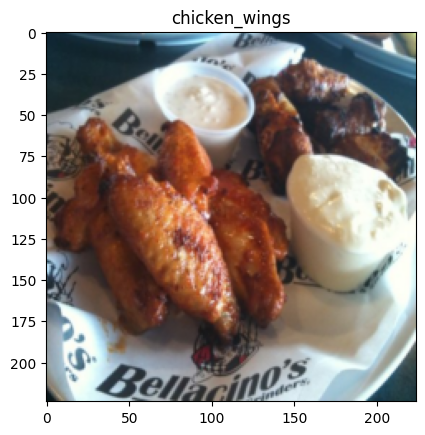

In [12]:
plt.imshow(train_data[22222][0].permute(1,2,0))
plt.title(class_names[train_data[22222][1]])

In [15]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader,len(train_dataloader),len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x1b507ce7650>,
 2368,
 790)

In [17]:

for batch,(X,y) in enumerate(train_dataloader):
    if  batch==2:
        print(y)
        print(X)
        break

#This is just to show and check if our data has been properly split.

tensor([10, 18, 34, 19, 92, 23, 19, 38, 29,  7, 45, 63,  0, 88, 61, 28,  5, 68,
        46, 45, 44, 59, 67, 32,  3, 12, 49, 30, 67, 85, 93,  6])
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.

## Model -> Architecture Inspired from **VGG-16**

### Dataset -> Food-101

In [79]:
INPUT_FEATURES = 3  #Number of colour channels.
HIDDEN_FEATURES = None #Variables per layer as inspired from VGG-16.
OUTPUT_FEATURES = 101  #Number of classes in Food101 Dataset.
import torch
import torch.nn as nn
import torch.nn.functional as F

class FoodClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolutional layers
        self.convolutional_blocks = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Fully connected layers (classifier) with nn.Flatten
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten the tensor before the fully connected layers
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 101)
        )
    
    def forward(self, x):
        # x = self.features(x)
        # print(x.shape)
        # x = self.classifier(x)
        # print(x.shape)
        # return x  #This was just to check shape mismatch, Newer return statement is faster.
        
        return self.classifier(self.convolutional_blocks(x))

In [80]:
model_0 = FoodClassifierModel().to(device)

model_0

FoodClassifierModel(
  (convolutional_blocks): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, str

In [81]:
from torchinfo import summary

summary(model_0)

Layer (type:depth-idx)                   Param #
FoodClassifierModel                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [82]:

random_image , random_label = train_data[10000][0], train_data[10000][1]
random_image=random_image.unsqueeze(0)
# print("-------random label ")
# print(random_label)
# print("-------random image shape")
# print(random_image.shape)
# print("-------")

random_prediction_to_test_dimensions = model_0(random_image.to(device))
# print("-------random prediction shape")
# print(random_prediction_to_test_dimensions.shape)
# print("-------softmax argmax shape")
# print(torch.softmax(random_prediction_to_test_dimensions,dim=1).argmax(1).shape)
# print("-------softmax argmax output")
# print(torch.argmax(torch.softmax(random_prediction_to_test_dimensions,dim=1),dim=1))
# print("-------squeezed output")
# print(torch.softmax(random_prediction_to_test_dimensions.squeeze(),dim=1).argmax(1))

print(torch.softmax(random_prediction_to_test_dimensions,dim=1).argmax(1))


tensor([96], device='cuda:0')


## Training and Testing -> 

In [83]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.RMSprop(params=model_0.parameters())

accuracy_fn = Accuracy(task="multiclass",num_classes=len(class_names)).to(device)

loss_fn,optimizer,accuracy_fn


(CrossEntropyLoss(),
 RMSprop (
 Parameter Group 0
     alpha: 0.99
     capturable: False
     centered: False
     differentiable: False
     eps: 1e-08
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     weight_decay: 0
 ),
 MulticlassAccuracy())

In [84]:
def training_step(model : torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module = loss_fn,
                  optimizer:torch.optim.Optimizer = optimizer,
                  accuracy_fn = accuracy_fn):
    
    model.train()
    
    training_loss = 0
    training_accuracy = 0
    
    for batch , (X,y) in enumerate(dataloader):
        
        X=X.to(device)
        y=y.to(device)
        
        y_prediction_logits = model(X)
        
        y_prediction_labels = torch.argmax(torch.softmax(y_prediction_logits,dim=1),dim=1) 
        
        optimizer.zero_grad()
        
        batch_loss = loss_fn(y_prediction_logits,y)
        training_loss+=batch_loss/len(dataloader)
        training_accuracy+=accuracy_fn(y_prediction_labels,y)/len(dataloader)
        
        batch_loss.backward()
        
        optimizer.step()
        
    
    return training_loss,training_accuracy
        
        

In [85]:
def testing_step(model : torch.nn.Module,
                 dataloader: torch.utils.data.DataLoader,
                 loss_fn:torch.nn.Module = loss_fn,
                 optimizer:torch.optim.Optimizer = optimizer,
                 accuracy_fn = accuracy_fn):
    
    model.eval()
    testing_loss = 0
    testing_accuracy = 0
    
    for X,y in dataloader:
    
        with torch.inference_mode():
            
            X=X.to(device)
            y=y.to(device)
            
            test_prediction_logits = model(X)
            test_prediction_labels = torch.argmax(torch.softmax(test_prediction_logits,dim=1),dim=1)
            
            test_loss = loss_fn(test_prediction_logits,y)
            test_acc = accuracy_fn(test_prediction_labels,y)
            
            testing_loss += test_loss/len(dataloader)
            testing_accuracy += test_acc/len(dataloader)
            
    return testing_loss,testing_accuracy
    

In [86]:
def train_and_test(model : torch.nn.Module,
                   epochs:int,
                   train_dataloader: torch.utils.data.DataLoader,
                   test_dataloader: torch.utils.data.DataLoader,
                   loss_fn:torch.nn.Module = loss_fn,
                   optimizer:torch.optim.Optimizer = optimizer,
                   accuracy_fn = accuracy_fn):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch} -> \n -----------")
        
        train_loss,train_acc= training_step(model=model,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer)
        test_loss,test_acc= testing_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)
        
        print(f"Training Loss : {train_loss:.4f} | Training Accuracy : {train_acc*100:.7f} | Testing Loss : {test_loss:.4f} | Testing Accuracy :{test_acc*100:.7f}")
        
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    
    return results

In [87]:
#This is the training and testing code.

train_and_test(model=model_0,epochs=20,train_dataloader=train_dataloader,test_dataloader=test_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0 -> 
 -----------


  0%|          | 0/20 [00:09<?, ?it/s]


KeyboardInterrupt: 

### Above in not an error, It was a keyboard interrupt. 

#  Refer the project details markdown file for more information.